In [578]:
# Imports
%matplotlib inline
import pandas as pd
from sklearn.neighbors import NearestCentroid
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
import nltk
import joblib

# file path - this for linux windows you will need "//"
feature = ["permission" , "permission_number", "url_css", "check_css_for_script", "check_css_for_malicious_code", "js_check", 
           "js_url", "total_url", "premission_new","sus", "total_js", "label"]
f_path = "/home/rivka/Desktop/chr/code (copy)/dataset5.csv"
df = pd.read_csv(f_path,names= feature, header=None)


df["premission_new"] = df["premission_new"].fillna('None')
column = df['premission_new']
array = column.values
lst = array.tolist()
tokenized_text = [nltk.word_tokenize(sentence.lower()) for sentence in lst]
try_model = open("Word2Vec_1.pkl","rb")
try_clf = joblib.load(try_model)
new_value = []

for x in tokenized_text:
    new_value.append(try_clf.wv[x].mean())


df["premission_new"] = new_value

In [579]:
X = list(zip(df["permission"],df["permission_number"],df["premission_new"],df["js_check"], df["sus"]))
y_true = np.stack(df["label"])

In [580]:
clf = OneClassSVM(gamma='scale').fit(X)
pred_clf = clf.predict(X)
pred_clf[pred_clf == 1] = 0
pred_clf[pred_clf == -1] = 1

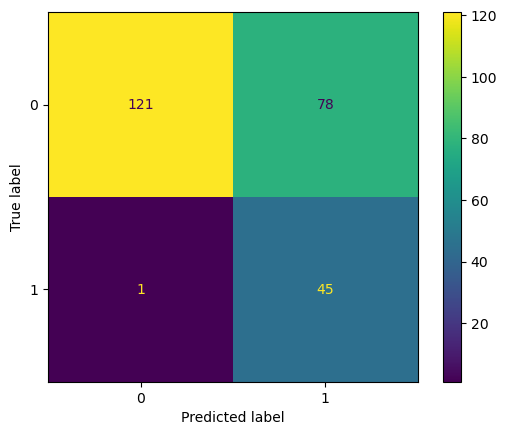

In [581]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, pred_clf, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [582]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred_clf)

0.6775510204081633

In [583]:
from sklearn.metrics import recall_score
recall_score(y_true, pred_clf)

0.9782608695652174

In [584]:
iso = IsolationForest(contamination=0.4,random_state=42).fit(X)
pred_iso = iso.predict(X)
pred_iso[pred_iso == 1] = 0
pred_iso[pred_iso == -1] = 1

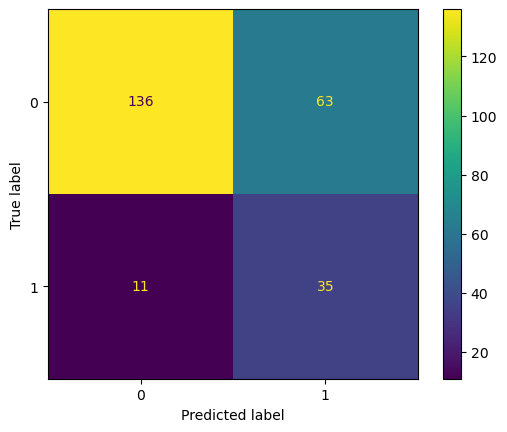

In [585]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, pred_iso, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [586]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred_iso)

0.6979591836734694

In [587]:
from sklearn.metrics import recall_score
recall_score(y_true, pred_iso)

0.7608695652173914

In [588]:
cov = EllipticEnvelope(contamination=0.5).fit(X)
pred_cov = cov.predict(X)
pred_cov[pred_cov == 1] = 0
pred_cov[pred_cov == -1] = 1

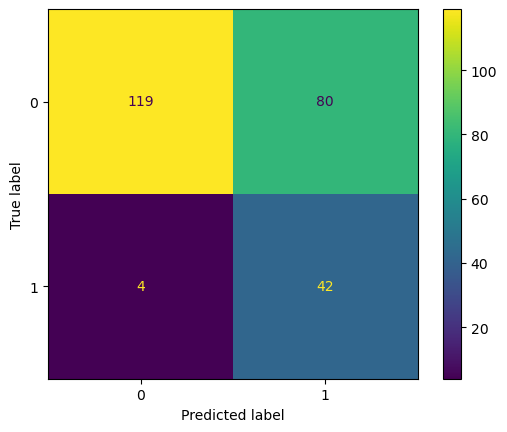

In [589]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, pred_cov, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [590]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred_cov)

0.6571428571428571

In [591]:
from sklearn.metrics import recall_score
recall_score(y_true, pred_cov)

0.9130434782608695

In [599]:
df["pred_clf"] = pred_clf
X_new = list(zip(df["permission"],df["permission_number"],df["premission_new"],df["js_check"], df["sus"],df["pred_clf"]))
cov = EllipticEnvelope(contamination=0.5,random_state=0).fit(X_new)
pred_con_new = cov.predict(X_new)
pred_con_new[pred_con_new == 1] = 0
pred_con_new[pred_con_new == -1] = 1

df["pred_con_new"] = pred1
X_new_2 = list(zip(df["permission"],df["permission_number"],df["premission_new"],df["js_check"], df["sus"],df["pred_clf"], df["pred_con_new"]))
cov1 = EllipticEnvelope(contamination=0.3,random_state=0).fit(X_new_2)
pred = cov1.predict(X_new_2)
pred[pred == 1] = 0
pred[pred == -1] = 1

/home/rivka/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-19.260021354493261 > -52.502236997002868). You may want to try with a higher value of support_fraction (current value: 0.514).
  warnings.warn(
/home/rivka/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-19.719762398589509 > -53.696912239930697). You may want to try with a higher value of support_fraction (current value: 0.514).
  warnings.warn(
/home/rivka/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-19.616035888833615 > -52.405474522649548). You may want to try with a higher value of support_fraction (current value: 0.514).
  w

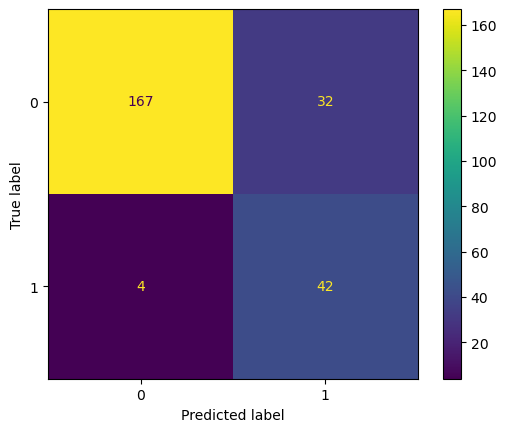

In [600]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [601]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred)

0.8530612244897959

In [602]:
from sklearn.metrics import recall_score
recall_score(y_true, pred)

0.9130434782608695